# Multi Layer Perceptron (MLP)

>### [예제 5] Digit Sign Classification : SLP/MLP Using tf.keras(Adam Optimizer)

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import cv2
from sklearn.model_selection import train_test_split

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Load Digit Sign Image

In [2]:
colab=True
try:
  from google.colab import drive
except:
  colab =False
if colab : 
    drive.mount('/content/drive')
    print('g-drive mounted.')
else : print('local drive.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
g-drive mounted.


In [3]:
# file path: 다른 경로에 실습파일을 복사했다면, 아래 경로를 수정하세요

if colab : 
  !unzip -q -o /content/drive/My\ Drive/files/Sign-Language-Digits-Dataset-master.zip
  files_path = '/content/Sign-Language-Digits-Dataset-master/Dataset/'
else : 
  files_path = 'c:/files/Sign-Language-Digits-Dataset-master/datasets/'

In [4]:
%%time
IMG_SIZE = 64
first = True
for ind in range(0, 10, 1) :
  path = files_path + str(ind) + '/*.*'
  print(path)
  files = glob.glob(path)
  tmpx = np.array([(cv2.resize(cv2.cvtColor(cv2.imread(x, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), (IMG_SIZE,IMG_SIZE))) for x in files])
  tmpy = np.array([ind] * len(files))
  xtrain, xtest, ytrain, ytest = train_test_split(tmpx, tmpy, test_size=0.2, random_state=123)
  if first == True:
    train_data = xtrain.copy()
    train_labels = ytrain.copy()
    test_data = xtest.copy()
    test_labels = ytest.copy()
    first = False
  else :
    train_data = np.concatenate((train_data, xtrain))
    train_labels = np.concatenate((train_labels, ytrain))
    test_data = np.concatenate((test_data, xtest))
    test_labels = np.concatenate((test_labels, ytest))

/content/Sign-Language-Digits-Dataset-master/Dataset/0/*.*
/content/Sign-Language-Digits-Dataset-master/Dataset/1/*.*
/content/Sign-Language-Digits-Dataset-master/Dataset/2/*.*
/content/Sign-Language-Digits-Dataset-master/Dataset/3/*.*
/content/Sign-Language-Digits-Dataset-master/Dataset/4/*.*
/content/Sign-Language-Digits-Dataset-master/Dataset/5/*.*
/content/Sign-Language-Digits-Dataset-master/Dataset/6/*.*
/content/Sign-Language-Digits-Dataset-master/Dataset/7/*.*
/content/Sign-Language-Digits-Dataset-master/Dataset/8/*.*
/content/Sign-Language-Digits-Dataset-master/Dataset/9/*.*
CPU times: user 1.1 s, sys: 103 ms, total: 1.2 s
Wall time: 1.19 s


In [5]:
train_data = train_data / 255.0
test_data = test_data / 255.0

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(1645, 64, 64, 3)
(1645,)
(417, 64, 64, 3)
(417,)


>### Create Model


In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE,3)),
  # tf.keras.layers.Dense(256, activation='sigmoid'),
  # tf.keras.layers.Dense(256, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                122890    
Total params: 122,890
Trainable params: 122,890
Non-trainable params: 0
_________________________________________________________________


> ### 학습 전 상황

In [7]:
def Make_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx*40+40].reshape((IMG_SIZE,IMG_SIZE, 3)),cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx*40+40, label[idx*40+40], y_max[idx*40+40]))

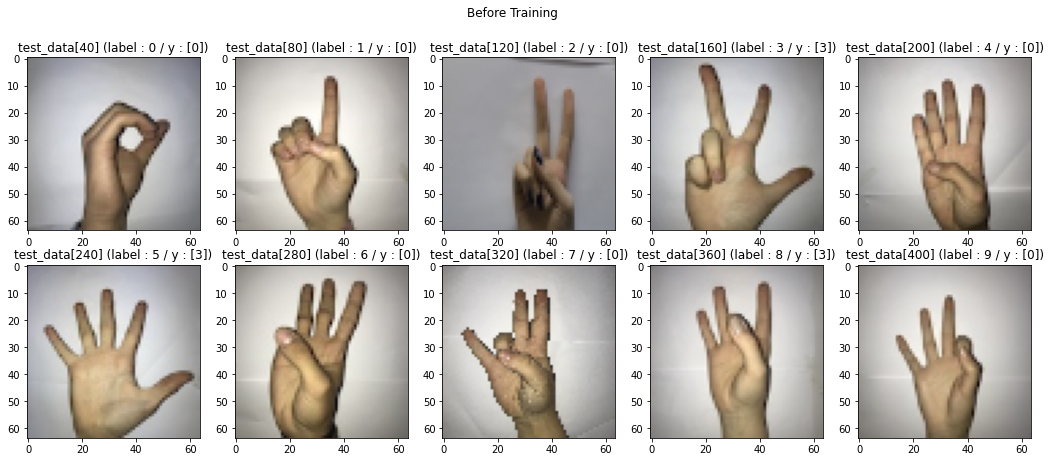

In [8]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("Before Training", test_data, test_labels, y_max)

> ### 학습 (Training)

In [9]:
%%time
history = model.fit(train_data, train_labels, shuffle=True,
                 batch_size=100, epochs=100,
                 validation_data=(test_data, test_labels)
                 )

Epoch 1/100
17/17 [==============================] - 0s 16ms/step - loss: 7.4600 - accuracy: 0.1070 - val_loss: 4.0356 - val_accuracy: 0.1007
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 3.9896 - accuracy: 0.1793 - val_loss: 2.2463 - val_accuracy: 0.2686
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 2.2881 - accuracy: 0.2553 - val_loss: 2.1239 - val_accuracy: 0.3429
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 1.8502 - accuracy: 0.3787 - val_loss: 1.7913 - val_accuracy: 0.3789
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 1.6175 - accuracy: 0.4809 - val_loss: 1.7875 - val_accuracy: 0.4005
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 1.5058 - accuracy: 0.5331 - val_loss: 1.4895 - val_accuracy: 0.5731
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 1.3607 - accuracy: 0.5964 - val_loss: 1.3948 - val_accuracy: 0.5612
Epoch 8/100


> ### Ploting : Cost/Training Count

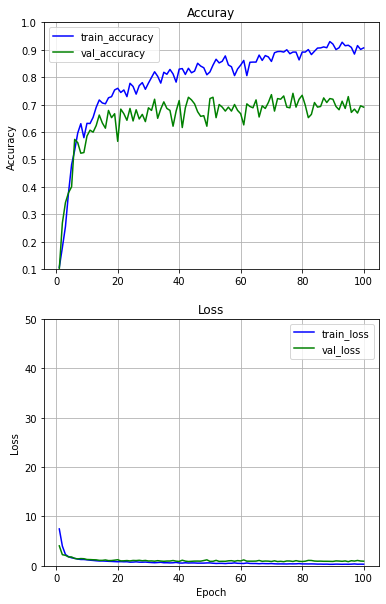

In [10]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.1,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,50])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

> ### Training 이후

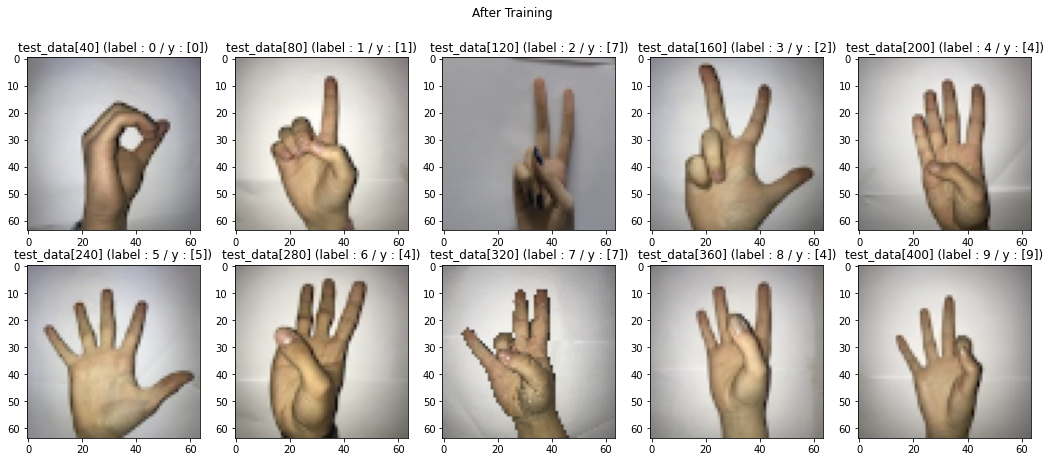

In [11]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)